In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from random import shuffle

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "img",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_name= dataset.class_names

In [5]:
len(dataset)

68

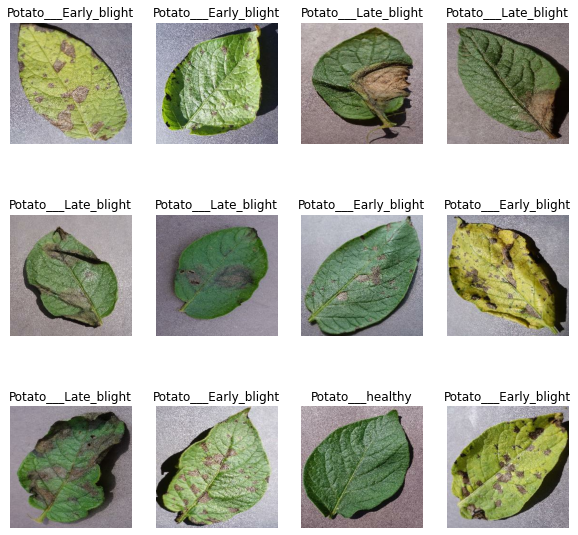

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_name[label_batch[i]])

Traininng => 80%
Testing => 10% Validation, 10% Testing

In [7]:
def get_dataset_seperated(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle_size= 10000):
    ds_size= len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_seperated(dataset)

In [9]:
len(train_ds)

54

In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
data_augmetation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [13]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_rescale,
    data_augmetation,
    layers.Conv2D(32,(3,3),activation ='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
history =  model.fit(
    train_ds,
    epochs= EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 216s 4s/step - loss: 0.8820 - accuracy: 0.5168 - val_loss: 0.7019 - val_accuracy: 0.6667
Epoch 2/50
54/54 [==============================] - 191s 4s/step - loss: 0.5942 - accuracy: 0.7280 - val_loss: 0.5427 - val_accuracy: 0.7760
Epoch 3/50
54/54 [==============================] - 190s 4s/step - loss: 0.5242 - accuracy: 0.7541 - val_loss: 0.5286 - val_accuracy: 0.7188
Epoch 4/50
54/54 [==============================] - 190s 4s/step - loss: 0.4018 - accuracy: 0.8229 - val_loss: 0.3346 - val_accuracy: 0.8750
Epoch 5/50
54/54 [==============================] - 190s 4s/step - loss: 0.3154 - accuracy: 0.8756 - val_loss: 0.2331 - val_accuracy: 0.9323
Epoch 6/50
54/54 [==============================] - 190s 4s/step - loss: 0.2655 - accuracy: 0.8964 - val_loss: 0.2187 - val_accuracy: 0.9323
Epoch 7/50
54/54 [==============================] - 189s 4s/step - loss: 0.2044 - accuracy: 0.9167 - val_loss: 0.2467 - val_accuracy: 0.8958
Epoch 8/50
54

In [17]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 15s 1s/step - loss: 0.0937 - accuracy: 0.9688


In [18]:
scores

[0.09369823336601257, 0.96875]